# Topic 41-42: Artificial Neural Networks

- 06/04/21
- onl91-dtsc-ft-022221

## Learning Objectives

- Start By Discussing Biological Neural Networks (powerpoint)
- Connect back to introduction from Canvas
- Demonstrate / play with Neural Network with Tensorflow Playground
- Walk through making neural networks with tensorflow/keras. 
- Learn how to evaluate neural networks.

- **Activity Part 1: Detecting Digits with Neural Networks**

- **Activity Part 2: Detecting Digits with Deep Networks**
- **Activity: Deeper Neural Networks Lab + Level Up**

## Questions/ Comments


# Topic 41: Intro to Deep Learning

## Biological Neural Networks

<img src="../Images/Brainbow-Hippocampus-rainbow-colors-large.jpg" width=60%>



> See `sect_40_bio_neural_networks_v2.pptx` for introduction to how biological neurons work. 


## Artificial Neural Networks 

    
- **The purpose of a neural network is to model $\hat y \approx y$ by minimizing loss/cost functions using gradient descent.**

- Neural networks are very good with unstructured data. (images, audio)

- **Networks are comprised of sequential layers of neurons/nodes.**
    - Each neuron applies a **linear transformation** and an **activation function** and outputs its results to all neurons in the next layer.
    - Minimizing Loss functions by adjusting parameters (weights and bias) of each connection using gradient descent (forward and back propagation).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-neural-networks-online-ds-ft-100719/master/images/new_first_network_num.png" width=80%>

- **Activation functions** control the output of a neuron.($\hat y =f_{activation}(x)$ )
    - Most basic activation function is sigmoid functin ($\hat y =\sigma(x)$)
    - Choice of activation function controls the size/range of the output.
    
    
    
- **Linear transformations** ( $z = w^T x + b$ ) are used control the output of the activation function .
    - where $w^T $ is the weight(/coefficient), $x$ is the input, and  $b$ is a bias. 
        - weights: 
        - bias:
        
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg.png">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg_deriv.png" >



- **Loss functions** ($\mathcal{L}(\hat y, y) $)  measure inconsistency between predicted ($\hat y$) and actual $y$
    - will be optimized using gradient descent
    - defined over 1 traning sample
    
    
- **Cost functions** takes the average loss over all of the samples.
    - $J(w,b) = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$
    - where $l$ is the number of samples
    

#### A Note On Shapes

- Inputs:
    - $n$: Number of inputs (columns) in the feature vector 
    - $l$: Number of items (rows) in the training set 
    - $m$: Number of items (rows) in the test set
    
    
- Input X:
    - Will have shape $n$ x $l$ (number of features x number of training data points/rows)

### Training ANNs
- **Forward propagation** is the calculating  loss and cost functions.


- **Back propagation** involves using gradient descent to update the values for  $w$ and $b$.
    - $w := w- \alpha\displaystyle \frac{dJ(w)}{dw}$ <br><br>
    - $b := b- \alpha\displaystyle \frac{dJ(b)}{db}$

        - where $ \displaystyle \frac{dJ(w)}{dw}$ and $\displaystyle \frac{dJ(b)}{db}$ represent the *slope* of the function $J$ with respect to $w$ and $b$ respectively
        - $\alpha$ denote the *learning rate*. 
        
        
        
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/neural_network_steps.png">

# Intro to Keras


### Keras Basics

- Tensors dimensions:
    - Scalars = 0D tensors
    - Vectors = 1D tensors
    - Matrices = 2D tensors
    - 3D tensors
- A tensor is defined by 3 characteristics:
    - rank or number of axes
    - the shape
    - the data type
- Tensor basics - properties (from [here](https://pgaleone.eu/tensorflow/2018/07/28/understanding-tensorflow-tensors-shape-static-dynamic/#tensors-the-basic)):
    - name
    - type:
        - tf.float32, tf.int64, tf.string
    - rank:
        - the number of dimension or the tensor. 
        - scalar = 0, vector = 1, etc.
    - shape:

### Important Data Manipulations in numpy

- **Unrowing matrices:**
    - e.g. turning a matrix of 790 images, which are 64 x 64 pixels and in RBG (3 colors) a (790, 64, 64, 3) matrix  into a matrix with 1 row for each image a ( 64*64*3, 790) matrix
    - img_unrow = img.reshape(790, -1).T
        - reshape -1 essentially means "figure out how many, based upon the dat'
- **Increasing the rank:**
    - Vector with `np.shape()` returns  `(790,)`
    - `np.reshape(vector, (1, 790))`
- **Tensor indexling/slicing**
    - just as python, `tensor[start_idx : end_idx]`
    - left inclusive, right exclusive

In [1]:
# !pip install -U tensorflow

In [2]:
import numpy as np
np.random.seed(123)

import tensorflow as tf
tf.random.set_seed(321)
print(tf.__version__)

2.4.0


In [3]:
# Tensor indexing example using images
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline  

Raw Tensor shape: (60000, 28, 28)
Single Image shape (28, 28)


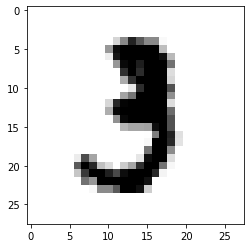

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[10] #Select an arbitrary case for our example

#Checking the shape of our tensor (in this case, the image)
print('Raw Tensor shape:', train_images.shape)

#Now performing some slices of our image:
print('Single Image shape', train_images[0].shape)


plt.imshow(digit, cmap=plt.cm.binary) #Display an example image for context
plt.show()

## Overview of Building a Neural Network with Keras


**Basics of Building a Neural Network with Keras:**
1. **Import required modules**
    - **For general neural network**
        - `from keras import models, layers,optimizers`
    - **For text:**
        - `from keras.preprocessing.text import Tokenizer`
        - `from keras.utils import to_categorical`
    - **For images:**
        - `from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img`
    - **For relocating image files:**
        - `import os, shutil`

2. **Decide on a network architecture (have only discussed sequential thus far)**
    - `model = models.Sequential()`

3. **Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.**
    - `model.add(layers.Dense(units, activation='relu', input_shape))`
    - `model.add(layers.Dense(units, activation='relu',input_shape))`
    - **3B. Final layer choice:**
        - Want to have as many neurons as classes you are trying to predict
        -  Final activation function:
            - For binary classificaiton, use `activation='sigmoid'`
            - For multi classificaiton, use `activation='softmax'`
        - For regression tasks, have a single final neuron.

4. **Compile the model:**
    - Specify optimiziers
        - `RMSprop`, `SGD`
    - specify loss functions
        - for binary classification: `'binary_crossentropy'`
        - for multi classification: `'categorical_crossentropy'`
    - specify metrics
        -usually 'acc'
    
    

5. **Training the model**
    - `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`
        - Note: if using images with ImageDataGenerator, use `model.fit_generator()`
    
    - **batches:**
        - a set of N samples, processed independently in parallel
        - a batch determines how many samples are fed through before back-propagation. 
        - model only updates after a batch is complete.
        - ideally have as large of a batch as your hardware can handle without going out of memory.
            - larger batches usually run faster than smaller ones for evaluation/prediction. 
    - **epoch:**
        - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
        - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
        - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).
        

6. **Evaluation / Predictions**
    - To get predicted results:
        - `y_hat_test = model.predict(test)`
    - To get evaluation metrics:
        - `results_test = model.evaluate(test, label_test)`
        

7. **Visualization**
    - **`history =  model.fit()` creates history object with .history attribute.**
        - `history.history()` returns a dictionary of metrics from each epoch. 
            - `history.history['loss']` and `history.history['acc']` 
 

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-image-classification-with-mlps-online-ds-ft-100719/master/images/Deeper_network.jpg">

## **Activity Part 1: Detecting Digits with Neural Networks**

### Basics of Building a Neural Network with Keras:


**Basics of Building a Neural Network with Keras:**
1. Import required modules
2. Decide on a network architecture (have only discussed sequential thus far)
3. Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.
4. Compile the model:
    - Specify optimiziers
    - specify loss functions
    - specify metrics

In [5]:
import tensorflow as tf
tf.random.set_seed(321)

from tensorflow.keras import layers,optimizers,activations,models
from tensorflow.keras.utils import to_categorical

print(tf.__version__)

2.4.0


In [6]:
len(train_images), len(test_images)

(60000, 10000)

#### Prepare images

In [7]:
## Reshape images as (num_images,-1)
train_img_unrow = train_images.reshape(len(train_images), -1)
test_img_unrow = test_images.reshape(len(test_images), -1)

## Scale data
train_img_unrow=train_img_unrow/255
test_img_unrow =test_img_unrow/255

In [8]:
## check train_img_unrow shape
train_img_unrow.shape,test_img_unrow.shape

((60000, 784), (10000, 784))

In [9]:
## check out an individual array's shape from train_img_unrow
train_img_unrow[0].shape

(784,)

### Preparing Targets

- This is a **Multiclass Classification** problem.
    - we need to One-Hot Encode our labels
    - `tensorflow.keras.utils.to_categorical`
    
- For multi classification:
    - good final activation function is softmax
    - categorical_crossentytropu


In [10]:
## Prepare y_train and y_train using to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
## Check the shape of y_train
print(y_train.shape)

(60000, 10)


#### 5. Training the model
- `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`

- **batches:**
    - a set of N samples, processed independently in parallel
    - a batch determines how many samples are fed through before back-propagation. 
    - model only updates after a batch is complete.
    - ideally have as large of a batch as your hardware can handle without going out of memory.
        - larger batches usually run faster than smaller ones for evaluation/prediction. 
- **epoch:**
    - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
    - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
    - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

- **`history =  model.fit()` creates history object with .history attribute.**
    - `history.history()` returns a dictionary of metrics from each epoch. 
        - `history.history['loss']` and `history.history['acc']`



In [12]:
## Print y_train shape
print(y_train.shape)
## Save the number of cols as n_classes
n_classes = y_train.shape[1]
n_classes

(60000, 10)


10

In [13]:
## What is the shape of our individual images?
print(train_img_unrow[0].shape)

(784,)


### Setting Network Architecture & Fitting Model

In [14]:
## Make a Sequential Model
model = models.Sequential()

## Hidden layer of 10 units with relu activation function
model.add(layers.Dense(10, activation = 'relu',input_shape=train_img_unrow[0].shape))

## Add final layer with 1 neuron and activation='sigmoid'
model.add(layers.Dense(n_classes,activation='softmax'))

## Compile with optimer as adam, loss as binary_crossentropy, and accuracy as metric
model.compile(optimizer='adam',#optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',#'mse',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fitting the model (10 epochs, batch size=64, validation_split=0.2)
history = model.fit(train_img_unrow, y_train, epochs=10,
                    batch_size=64,validation_split=0.2) 

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 1.1197 - accuracy: 0.6569 - val_loss: 0.3387 - val_accuracy: 0.9091
Epoch 2/10
750/750 [==============================] - 1s 856us/step - loss: 0.3380 - accuracy: 0.9043 - val_loss: 0.2826 - val_accuracy: 0.9240
Epoch 3/10
750/750 [==============================] - 1s 803us/step - loss: 0.2902 - accuracy: 0.9183 - val_loss: 0.2651 - val_accuracy: 0.9243
Epoch 4/10
750/750 [==============================] - 1s 911us/step - loss: 0.2697 - accuracy: 0.9228 - val_loss: 0.2567 - val_accuracy: 0.9277
Epoch 5/10
750/750 [==============================] - 1s 987us/step - loss: 0.2557 - accuracy: 0.9265 - val_loss: 0.2488 - val_accuracy: 0.9292
Epoch 6/10
750/750 [==============================] - 1s 797us/step - loss: 0.2544 - accuracy: 0.9269 - val_loss: 0.2462 - val_accuracy: 0.9302
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.2420 - accuracy: 0.9315 - val_loss: 0.2427 - val_accuracy: 0.9

In [16]:
## Make a dataframe out of history
res_df = pd.DataFrame(history.history)#.plot()
res_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.675730,0.808708,0.338685,0.909083
1,0.323417,0.909563,0.282649,0.924000
2,0.285952,0.919333,0.265145,0.924333
3,0.268971,0.923167,0.256745,0.927667
4,0.257436,0.926521,0.248806,0.929167


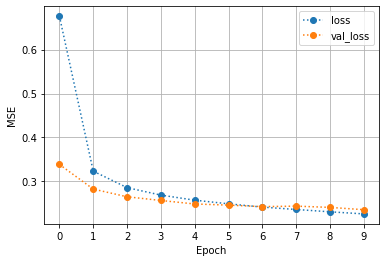

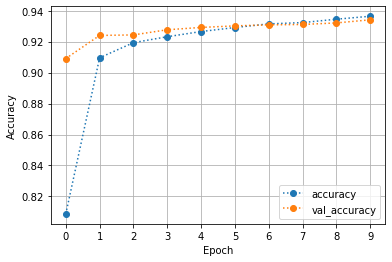

In [36]:
## Plot Losses
plot_kws = dict(marker='o',ls=':')

ax1 = res_df[[col for col in res_df.columns if 'loss' in col]].plot(**plot_kws)
ax1.set(xlabel='Epoch',ylabel='MSE')

## Plot accuracy
ax2 = res_df[[col for col in res_df.columns if 'acc' in col]].plot(**plot_kws)
ax2.set(xlabel='Epoch',ylabel='Accuracy')


for ax in (ax1,ax2):
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.grid()
# [a.grid() for a in (ax1,ax2)]

In [18]:
preds = model.predict(test_img_unrow)
preds[0].argmax()

7

In [19]:
preds[0].round()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Evaluating Neural Networks

In [20]:
train_loss, train_acc  = model.evaluate(train_img_unrow,y_train)#score()
test_loss,test_acc = model.evaluate(test_img_unrow,y_test)
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

313/313 [==============================] - 0s 713us/step - loss: 0.2434 - accuracy: 0.9311
Training Accuracy: 0.938
Test Accuracy: 0.931


In [21]:
## Get pred
y_hat_test = model.predict(test_img_unrow)
y_hat_train = model.predict(train_img_unrow)

y_hat_test

array([[2.9445529e-05, 7.0998303e-12, 7.0660550e-05, ..., 9.9753845e-01,
        2.9133816e-06, 6.0003636e-06],
       [1.3061521e-04, 1.6471850e-04, 9.8732620e-01, ..., 4.8248018e-16,
        2.1721993e-04, 3.3086150e-10],
       [4.3109187e-05, 9.7071564e-01, 1.5178168e-02, ..., 3.4522873e-03,
        4.3883831e-03, 1.2371295e-04],
       ...,
       [8.2014986e-07, 1.3989229e-08, 1.2891011e-06, ..., 3.3311418e-04,
        1.2407094e-03, 7.6735746e-03],
       [1.9249578e-06, 1.3365766e-07, 3.7228060e-04, ..., 7.7155455e-08,
        2.9830101e-03, 8.2893303e-11],
       [1.4900298e-06, 2.3240483e-13, 6.5161880e-06, ..., 2.2692400e-11,
        1.4535066e-09, 5.7570940e-12]], dtype=float32)

In [22]:
## Print CLassification Report
from sklearn import metrics
print(metrics.classification_report(y_test,y_hat_test))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

> Ruh roh!

In [23]:
## Check y_test, and y_hat_test's shape
y_test.shape, y_hat_test.shape

((10000, 10), (10000, 10))

In [24]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
## What does one y-value look like?
y_hat_test[0]

array([2.9445529e-05, 7.0998303e-12, 7.0660550e-05, 2.3414157e-03,
       4.4404278e-08, 1.1001952e-05, 4.7935833e-10, 9.9753845e-01,
       2.9133816e-06, 6.0003636e-06], dtype=float32)

In [26]:
y_hat_test[0].shape

(10,)

In [27]:
## Take the .argmax(axis=1) of the y-data
y_hat_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [28]:
## Make y_pred and y_true and y_test sklearn compatible
y_test_class =y_test.argmax(axis=1)
y_hat_test_class = y_hat_test.argmax(axis=1)

## Make y_pred and y_true and y_test sklearn compatible
y_train_class =y_train.argmax(axis=1)
y_hat_train_class = y_hat_train.argmax(axis=1)

In [29]:
# Use y_true,y_pred to get classification report
print("CLASSIFICATION REPORT -  TRAINING DATA")
print(metrics.classification_report(y_train_class,y_hat_train_class))
print('\n'*2)
print("CLASSIFICATION REPORT -  TEST DATA")
print(metrics.classification_report(y_test_class,y_hat_test_class))

CLASSIFICATION REPORT -  TRAINING DATA
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5923
           1       0.97      0.97      0.97      6742
           2       0.93      0.94      0.93      5958
           3       0.93      0.89      0.91      6131
           4       0.92      0.95      0.94      5842
           5       0.90      0.90      0.90      5421
           6       0.95      0.97      0.96      5918
           7       0.96      0.95      0.95      6265
           8       0.92      0.91      0.91      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000




CLASSIFICATION REPORT -  TEST DATA
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
 

[Text(69.0, 0.5, 'True Class'),
 Text(0.5, 117.59999999999997, 'Predicted Class')]

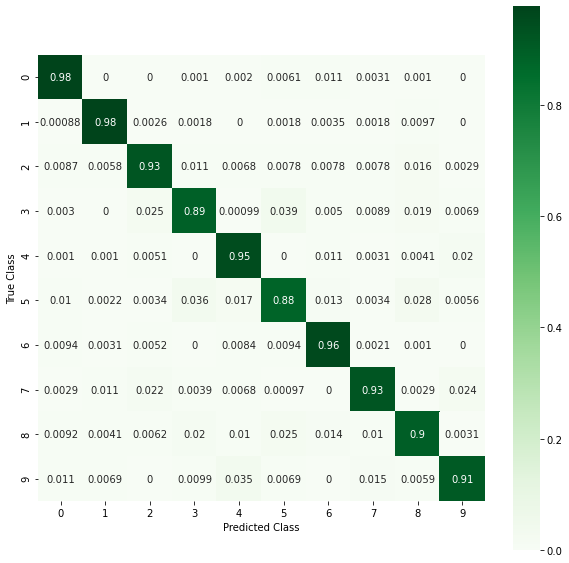

In [30]:
## Get the confusion matrix 
cm = metrics.confusion_matrix(y_test_class, y_hat_test_class,normalize='true')


## Plot the confusion Matrix
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
ax.set(ylabel='True Class',xlabel='Predicted Class')

### def `evaluate_network`:

In [49]:
def evaluate_network(model, X_test,y_test,history=None,cmap='Greens',
                            normalize='true',classes=None,figsize=(10,4),
                            X_train = None, y_train = None,metrics_list=['acc','loss']):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model (classifier): any sklearn classification model.
        X_test_tf (Frame or Array): X data
        y_test (Series or Array): y data
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.
        classes (list, optional): List of class names for display. Defaults to None.
        figsize (tuple, optional): figure size Defaults to (8,4).
        
        X_train (Frame or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
    """
    header =  '==='*20
    print(header,'\t[i] MODEL HISTORY',header,sep='\n')
    
    if history is not None:
        ## Make a dataframe out of history
        res_df = pd.DataFrame(history.history)#.plot()

        ## Plot Losses
        plot_kws = dict(marker='o',ls=':')
        
        ## Plot all metrics
        for metric in metrics_list:
            ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
            ax.set(xlabel='Epoch',ylabel=metric)
            ax.grid()
            ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
            plt.show()
           
        
        

    ## Evaluate Network for scores
    try:
        print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
        if X_train is not None:
            train_loss, train_acc  = model.evaluate(X_train,y_train)#score()
     
        ## Get Test Accuracy
        test_loss,test_acc = model.evaluate(X_test,y_test)
        
        if X_train is not None:
            print(f"\tTraining Accuracy: {train_acc:.3f}")
        print(f"\tTest Accuracy: {test_acc:.3f}")
        print()
        
    except Exception as e:
        print("Error evaluating for accuracy:")
        print(e)
        
        
    ## Get preds for test
    y_test_class =y_test.argmax(axis=1)
    y_hat_test = model.predict(X_test)
    y_hat_test_class = y_hat_test.argmax(axis=1)
    
     #Use y_true,y_pred to get classification report
    if X_train is not None:
        print(header,"\t[i] CLASSIFICATION REPORT - TRAINING DATA",
              header,sep='\n')
        y_hat_train = model.predict(X_train)
        y_train_class =y_train.argmax(axis=1)
        y_hat_train_class = y_hat_train.argmax(axis=1)
        print(metrics.classification_report(y_train_class,y_hat_train_class))
        print()
        cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
                                      normalize='true')

        ## Plot the confusion Matrix
        fig,ax = plt.subplots(figsize=(10,10))
        sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
        ax.set(ylabel='True Class',xlabel='Predicted Class',
               title='Confusion Matrix - Training Data')    
    
    print(header,"\t[i] CLASSIFICATION REPORT -  TEST DATA",header,sep='\n')
    print(metrics.classification_report(y_test_class,y_hat_test_class))

     ## Get the confusion matrix 
    print()
    cm = metrics.confusion_matrix(y_test_class, y_hat_test_class,normalize='true')
    ## Plot the confusion Matrix
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
    ax.set(ylabel='True Class',xlabel='Predicted Class',
           title='Confusion Matrix - Test Data') 
    plt.show()
        
        


	[i] MODEL HISTORY


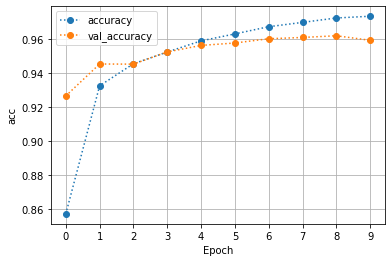

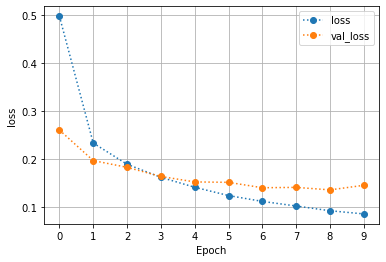

	[i] EVALUATING MODEL
313/313 [==============================] - 0s 568us/step - loss: 0.2434 - accuracy: 0.9311
	Training Accuracy: 0.938
	Test Accuracy: 0.931

	[i] CLASSIFICATION REPORT - TRAINING DATA
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5923
           1       0.97      0.97      0.97      6742
           2       0.93      0.94      0.93      5958
           3       0.93      0.89      0.91      6131
           4       0.92      0.95      0.94      5842
           5       0.90      0.90      0.90      5421
           6       0.95      0.97      0.96      5918
           7       0.96      0.95      0.95      6265
           8       0.92      0.91      0.91      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000


	[i] CLASSIFICATION REPORT -  TEST 

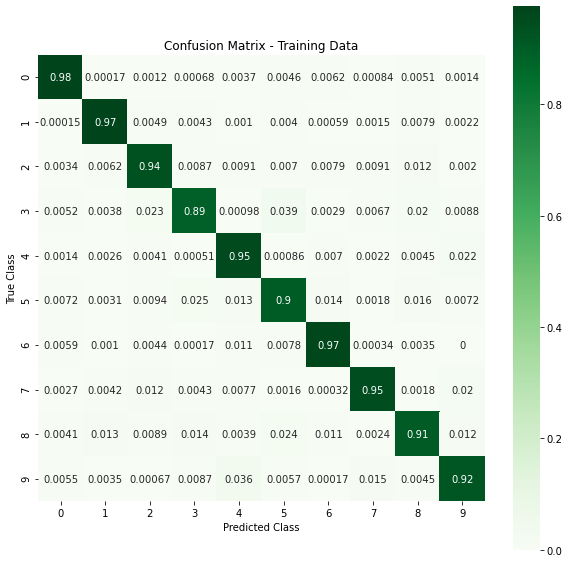

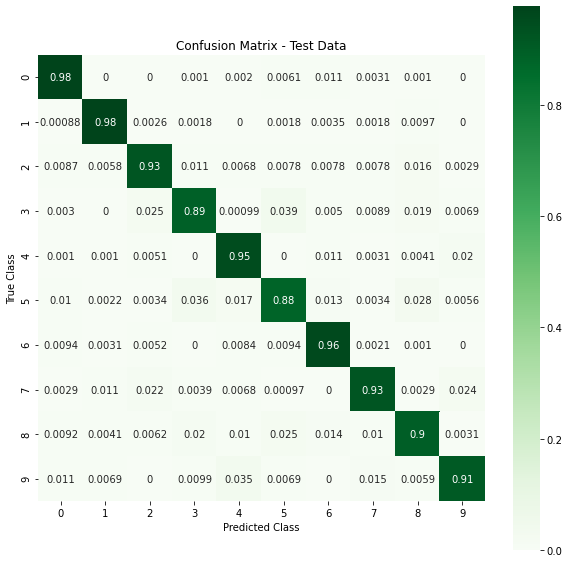

In [50]:
evaluate_network(model, test_img_unrow,y_test,history=history,
                           X_train = train_img_unrow,y_train=y_train)

## Activation Functions 

In [51]:
import os,sys
sys.path.append(os.path.abspath('../'))
from functions import *

- **sigmoid:**<br>
<!-- <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_33_1.png" width=200> -->
    - $ f_a=\dfrac{1}{1+ \exp(-z)}$
    - outputs 0 to +1
    

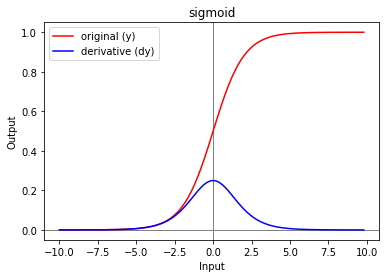

In [52]:
plot_activation(sigmoid)

- **tanh (hyperbolic tan):**<br>
    - $f_a = =\dfrac{\exp(z)- \exp(-z)}{\exp(z)+ \exp(-z)}$
    - outputs -1 to +1
    - Generally works well in intermediate layers
    - one of most popular functions
    

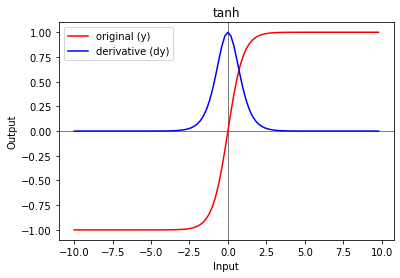

In [53]:
plot_activation(tanh)

- **arctan**
    -  similar qualities as tanh, but slope is more gentle than tanh
    - outputs ~ 1.6 to 1.6
    

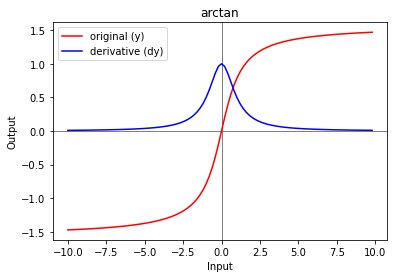

In [54]:
plot_activation(arctan)

-  **Rectified Linear Unit (relu):**<br>
    - most popular activation function
    - Activation is exactly 0 when Z <0
    - Makes taking directives slightly cumbersome
    - $f_a=\max(0,z)$
    

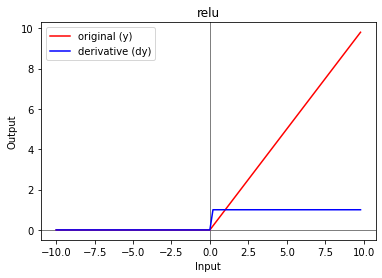

In [55]:
plot_activation(relu)

- **leaky_relu:**
    -  altered version of relu where the activatiom is slightly negative when $z<0$
    - $f_a=\max(0.001*z,z)$

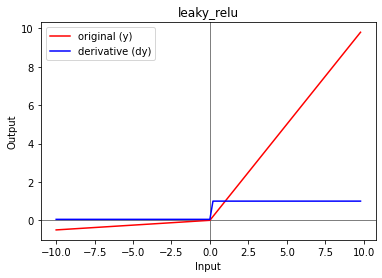

In [56]:
plot_activation(leaky_relu)

# Topic 41:  Deeper Neural Networks

## Topic 41: Learning Objectives

- Review basics from last class about an individual neuron. 
- Use `repo folder > references  > ANN diagrams.pptx` to talk through inputs and outputs

- Revisit bio neural networks PowerPoint with and discuss "How Neurons Learn" to review biological inspiration of deeper ANNs
    - `repo folder> references > bio_neural_networks.pptx`

- **Discuss details about deep neural networks:**
    - what makes an ANN "deep"?
    - what are the different activation functions?

## Deep Neural Networks

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-neural-networks-onl01-dtsc-ft-070620/master/images/Deeper_network.jpg">

## Why deeper networks?

- **Advantages:**
    - largely eliminates need for feature engineering
    - multiple levels of information processing in one networking.
        - Ex: for images:
            - First layer detects edges
            - second layer gorups edges and detects patterns
            - more layers group even bigger parts together
        - Ex: for audio:
            - first layer: low level wave features
            - second: basic units of sounds ("phonemes")
            - third: word recognition
            - fourth: sentence recognition
    

## How many layers/units?

- **Two schools of thought on how how many layers:**
    - Start with a single layer with few neurons
        - Add additional, add additional
    - Start with a fully fleshed out network that we then prune until we see a dropoff in in performance (then restore the last changes)

# **Activity Part 2: Detecting Digits with Deep Networks**

> Reat our modeling steps from above, but wrap it in a `make_deep_model` function and increase the number of layers and re-evaluate

In [84]:
def make_deep_model():
    ## Make a Sequential Model
    deep_model = models.Sequential()

    ## Hidden layer of 10 units with relu activation function
    deep_model.add(layers.Dense(64, activation = 'relu',
                                input_shape=train_img_unrow[0].shape))

    deep_model.add(layers.Dense(32, activation = 'relu',#layers.LeakyReLU(),#'tanh',
                                input_shape=train_img_unrow[0].shape))

    ## Add final layer with 1 neuron and activation='sigmoid'
    deep_model.add(layers.Dense(n_classes,activation='softmax'))

    ## Compile with optimer as adam, loss as binary_crossentropy, and accuracy as metric
    deep_model.compile(optimizer='adam',#optimizers.RMSprop(lr=0.001),
                  loss='categorical_crossentropy',#'mse',
                  metrics=['accuracy'])
    display(deep_model.summary())
    return deep_model

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_51 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
750/750 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.7922 - val_loss: 0.1947 - val_accuracy: 0.9470
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.1811 - accuracy: 0.9468 - val_loss: 0.1414 - val_accuracy: 0.9574
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.1253 - accuracy: 0.9625 - val_loss: 0.1422 - val_accuracy: 0.9566
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1010 - accuracy: 0.9700 - val_loss: 0.1210 - val_accuracy: 0.9634
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0824 - accuracy: 0.9749 - val_loss: 0.1164 - val_accuracy: 0.9667
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0717 - accuracy: 0.9792 - val_loss: 0.1117 - val_accuracy: 0.9654
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0558 - accuracy: 0.9837 - val_loss: 0.1080 - val_accuracy: 0.9688
Epoch 

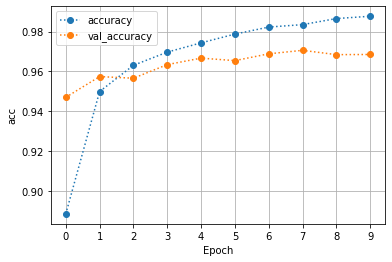

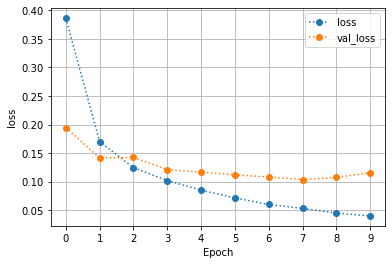

	[i] EVALUATING MODEL
313/313 [==============================] - 0s 767us/step - loss: 0.1031 - accuracy: 0.9695
	Training Accuracy: 0.986
	Test Accuracy: 0.970

	[i] CLASSIFICATION REPORT - TRAINING DATA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.98      0.98      0.98      6131
           4       0.99      0.99      0.99      5842
           5       1.00      0.96      0.98      5421
           6       0.98      1.00      0.99      5918
           7       0.99      0.98      0.99      6265
           8       0.97      0.99      0.98      5851
           9       0.98      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


	[i] CLASSIFICATION REPORT -  TEST 

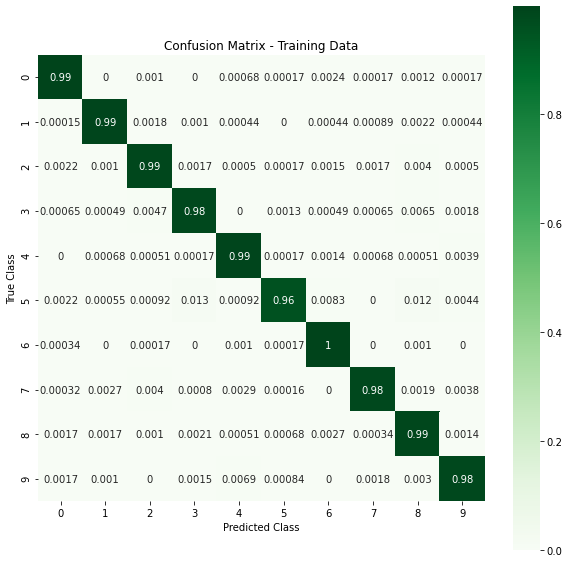

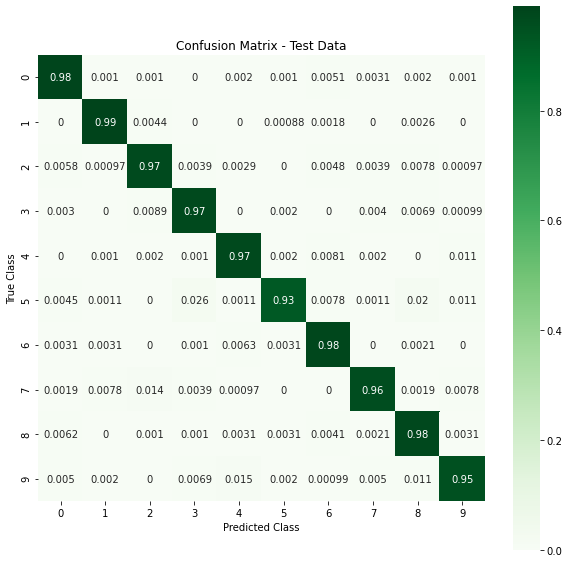

In [85]:
# Fitting the model (10 epochs, batch size=64, validation_split=0.2)
deep_model = make_deep_model()
history = deep_model.fit(train_img_unrow, y_train, epochs=10,
                    batch_size=64,validation_split=0.2) 

evaluate_network(deep_model, test_img_unrow,y_test,history=history,
                           X_train = train_img_unrow,y_train=y_train)

# **Activity: Deeper Neural Networks Lab + Level Up**

> **Bonus Assignment for us: Add a final model where we use MinMaxScaler instead of StandardScaler and look for convergence.**
- `repo folder` > `Phase_4` >`topic_40-41_neural_networks` >`labs`

# APPENDIX

### Using the chain rule for updating parameters with sigmoid activation function example:
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg_deriv.png" >
- $\displaystyle \frac{dJ(w,b)}{dw_i} = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} \frac{d\mathcal{L}(\hat y^{(i)}, y^{(i)})}{dw_i}$
 
 
- For each training sample $1,...,l$ you'll need to compute:

    - $ z^{(i)} = w^T x^ {(i)} +b $

    - $\hat y^{(i)} = \sigma (z^{(i)})$

    - $dz^{(i)} = \hat y^{(i)}- y^{(i)}$

- Then, you'll need to make update:

    - $J_{+1} = - [y^{(i)} \log (\hat y^{(i)}) + (1-y^{(i)}) \log(1-\hat y^{(i)})$ (for the sigmoid function)

    - $dw_{1, +1}^{(i)} = x_1^{(i)} * dz^{(i)}$

    - $dw_{2, +1}^{(i)} = x_2^{(i)} * dz^{(i)}$

    - $db_{+1}^{(i)} =  dz^{(i)}$

    - $\dfrac{J}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{db}{m}$

- After that, update: 

    $w_1 := w_1 - \alpha dw_1$

    $w_2 := w_2 - \alpha dw_2$

    $b := b - \alpha db$

    repeat until convergence!
    
    